In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras

In [ ]:
import os,cv2
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K

K.image_data_format()=='th'
# from keras.layers import Merge
from keras.layers import Concatenate
# from keras.utils import np_utils
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
ATH = os.getcwd()
# Define data path
data_path = r'/content/drive/MyDrive/Projects/ADN eyedataset/ADN eye dataset - Copy'

data_dir_list = os.listdir(data_path)
img_rows=128
img_cols=128
num_channel=1
num_epoch=20
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)

# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 3
label_index=0
img_data_list=[]
img=0

In [ ]:
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        if dataset[0]==  'A':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0] == 'D':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0] == 'N':
            labels[label_index] = 2
        label_index = label_index+1
            #print(dataset[0])


Loaded the images of dataset-AMD1

Loaded the images of dataset-AMD10

Loaded the images of dataset-AMD11

Loaded the images of dataset-AMD12

Loaded the images of dataset-AMD13

Loaded the images of dataset-AMD14

Loaded the images of dataset-AMD15

Loaded the images of dataset-AMD2

Loaded the images of dataset-AMD3

Loaded the images of dataset-AMD4

Loaded the images of dataset-AMD5

Loaded the images of dataset-AMD6

Loaded the images of dataset-AMD7

Loaded the images of dataset-AMD8

Loaded the images of dataset-AMD9

Loaded the images of dataset-DME1

Loaded the images of dataset-DME10

Loaded the images of dataset-DME11

Loaded the images of dataset-DME12

Loaded the images of dataset-DME13

Loaded the images of dataset-DME14

Loaded the images of dataset-DME15

Loaded the images of dataset-DME2

Loaded the images of dataset-DME3

Loaded the images of dataset-DME4

Loaded the images of dataset-DME5

Loaded the images of dataset-DME6

Loaded the images of dataset-DME7

Loaded t

In [ ]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

# Using 'th' for the image_dim_ordering we get accuracy >=0.99 .
# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs
if num_channel==1:
    if K.image_data_format()=='channels_first':
        img_data= np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3)
        print (img_data.shape)

else:
    if K.image_data_format()=='channels_first':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(3231, 128, 128)
(3231, 128, 128, 1)


In [ ]:
labels[0:722] = 0
labels[723:1823] = 1
labels[1824:3231] = 2

In [ ]:
# Define the number of classes
num_classes = 3

names = ['AMD','DME','NORMAL']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
#print(Y)
#Shuffle the dataset with random state=2
x,y = shuffle(img_data, Y,random_state=2)
#print(y)
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)
#print(y_test)
print(X_train.shape)
print(y_train.shape)

(2584, 128, 128, 1)
(2584, 3)


In [ ]:
ann_model = Sequential([
    Flatten(input_shape=(128,128,1)),Dense(128,activation = 'relu'),
    Dropout(0.2), Dense(64,activation = 'relu'),Dropout(0.2),Dense(3,activation = 'softmax')])

In [ ]:
ann_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
hist = ann_model.fit(X_train,y_train,epochs = 40,batch_size=16,verbose = True,validation_split = 0.2)

Epoch 1/40
130/130 [==============================] - 8s 49ms/step - loss: 1.1599 - accuracy: 0.5743 - val_loss: 0.6017 - val_accuracy: 0.7253
Epoch 2/40
130/130 [==============================] - 6s 46ms/step - loss: 0.6877 - accuracy: 0.7025 - val_loss: 0.5240 - val_accuracy: 0.7795
Epoch 3/40
130/130 [==============================] - 5s 41ms/step - loss: 0.5606 - accuracy: 0.7600 - val_loss: 0.5758 - val_accuracy: 0.7408
Epoch 4/40
130/130 [==============================] - 5s 35ms/step - loss: 0.5908 - accuracy: 0.7339 - val_loss: 0.3641 - val_accuracy: 0.8433
Epoch 5/40
130/130 [==============================] - 5s 40ms/step - loss: 0.3865 - accuracy: 0.8423 - val_loss: 0.2393 - val_accuracy: 0.9284
Epoch 6/40
130/130 [==============================] - 5s 38ms/step - loss: 0.3394 - accuracy: 0.8582 - val_loss: 0.1829 - val_accuracy: 0.9574
Epoch 7/40
130/130 [==============================] - 5s 39ms/step - loss: 0.3092 - accuracy: 0.8655 - val_loss: 0.1909 - val_accuracy: 0.9497

21/21 [==============================] - 0s 6ms/step
[[9.143e-07 2.516e-07 1.000e+00]
 [2.253e-10 3.178e-10 1.000e+00]
 [9.976e-01 1.079e-03 1.368e-03]
 ...
 [5.470e-07 1.201e-07 1.000e+00]
 [7.316e-12 2.699e-07 1.000e+00]
 [3.308e-10 5.828e-11 1.000e+00]]
[2 2 0 2 2 2 1 1 1 2 1 1 1 1 1 2 0 2 1 2 2 1 1 0 2 2 1 2 2 2 1 0 1 2 2 2 2
 0 2 2 2 2 2 2 1 1 2 2 0 0 2 0 2 1 2 1 0 2 2 2 1 1 2 1 2 0 2 2 0 2 1 0 1 0
 1 1 1 2 1 2 1 0 2 2 1 2 0 2 0 1 2 1 1 2 0 2 1 1 2 2 2 2 0 2 0 1 0 1 1 2 1
 2 1 1 2 0 2 2 2 1 2 2 0 2 1 2 1 2 2 2 1 2 2 0 0 1 2 2 1 1 0 1 2 1 2 1 1 1
 1 1 1 2 2 0 2 0 1 2 1 2 0 2 1 1 2 2 2 2 2 1 0 1 2 1 1 2 1 2 1 2 0 2 1 0 1
 1 0 1 2 2 2 0 1 0 1 1 2 1 2 2 2 2 1 1 0 2 1 2 0 2 0 2 1 2 1 0 1 1 1 2 2 2
 2 2 2 2 0 1 0 1 1 1 0 2 1 1 2 1 1 1 2 2 2 1 1 0 0 2 1 2 2 0 2 0 2 2 2 1 2
 2 0 1 2 2 1 1 1 2 0 2 2 1 2 2 2 2 1 2 1 2 1 0 1 2 2 2 1 2 0 1 1 1 1 2 2 2
 2 2 2 0 1 2 2 1 2 2 2 0 1 2 0 1 1 1 1 2 0 0 1 2 1 0 1 1 1 2 2 0 0 1 1 2 1
 2 1 2 0 0 1 0 0 2 0 2 2 1 1 2 0 1 2 0 1 2 2 1 1 1 0 2 2 1 2 1 2 0 0

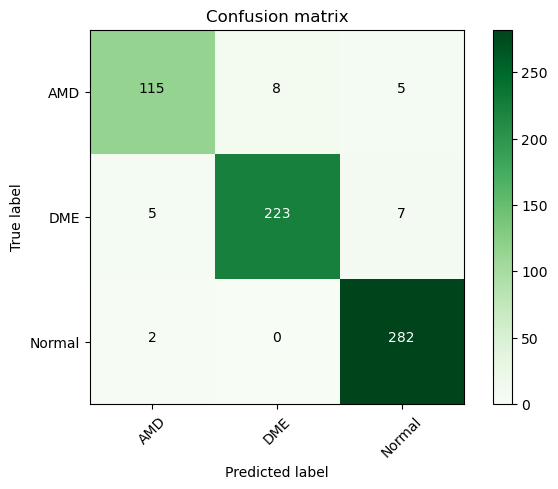

In [ ]:
# Predict model on Test Data

Y_pred = ann_model.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred =  np.argmax(Y_pred, axis=1)
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()



# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Reshape the image data for Random Forest model
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Flatten the image data for Random Forest model
X_train_rf = X_train_rf.reshape(X_train_rf.shape[0], -1)
X_test_rf = X_test_rf.reshape(X_test_rf.shape[0], -1)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_rf, y_train)

# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the Random Forest model
rf_accuracy = np.mean(y_pred_rf == y_test) * 100
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy))


Random Forest Accuracy: 97.68%


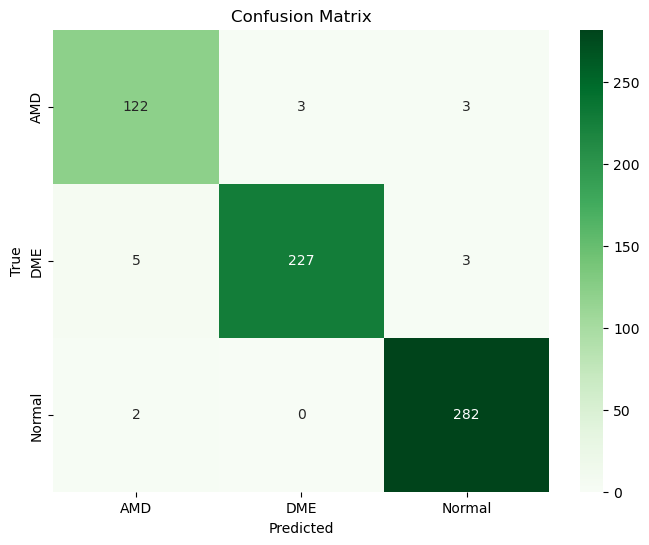

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1).reshape(-1), np.argmax(y_pred_rf, axis=1).reshape(-1))

# Define class labels and target names
class_labels = ['AMD', 'DME', 'NORMAL']
target_names = ['AMD', 'DME', 'Normal']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
#reversing one hot encoding
a = np.array(y_test)
import pandas as pd
df= pd.DataFrame({"0":a[:,0],"1":a[:,1],"2":a[:,2]})
df['tags']=''
for col_name in df.columns:
    df.loc[df[col_name]==1,'tags']= df['tags']+' '+col_name


df['tags'] = df['tags'].astype(int)
print(classification_report(df['tags'], y_pred, target_names=target_names))


              precision    recall  f1-score   support

         AMD       0.94      0.90      0.92       128
         DME       0.97      0.95      0.96       235
      Normal       0.96      0.99      0.98       284

    accuracy                           0.96       647
   macro avg       0.96      0.95      0.95       647
weighted avg       0.96      0.96      0.96       647

